# Learning a CStree

In [2]:
import numpy as np
import networkx as nx

import cstrees.cstree as ct
import cstrees.stage as st
import cstrees.learning as ctl

%load_ext autoreload
%autoreload 2

## Create the true CStree

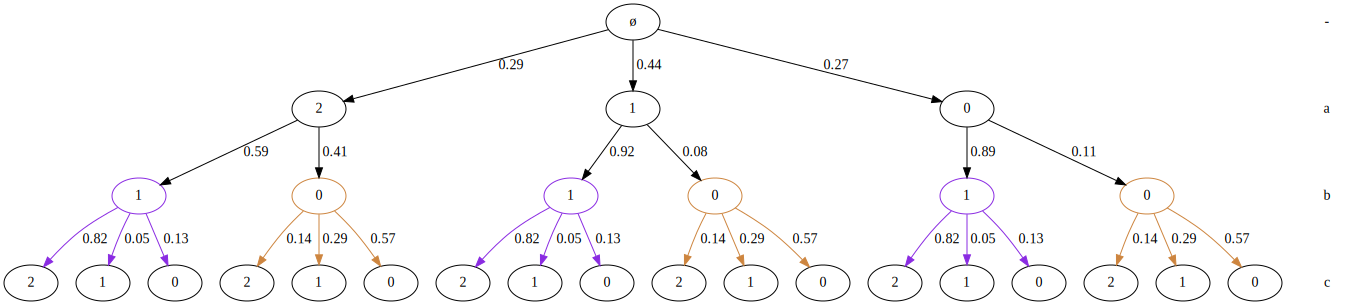

In [3]:
np.random.seed(5)
tree = ct.CStree([3, 2, 3], labels=["a", "b", "c"])

tree.update_stages({
    0: [st.Stage([0]), st.Stage([1]), st.Stage([2])],
    1: [st.Stage([{0, 1, 2}, 0]), 
        st.Stage([{0, 1, 2}, 1]),
        st.Stage([{0, 1, 2}, 2])
        ]})

tree.sample_stage_parameters(alpha=1.0)
tree.plot()


context:  None


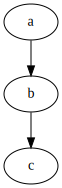

In [4]:
true_cdags = tree.to_minimal_context_graphs()
for key, val in true_cdags.items():
    print("context: ", key)
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png",
                args='-Glabel="'+str(key)+'"   ')
agraph


## Draw a lot of samples

In [8]:
df = tree.sample(2000)
df

,a,b,c
0,3,2,3
1,1,0,1
2,0,1,2
3,1,1,2
4,2,1,0
...,...,...,...
1996,1,1,2
1997,1,1,2
1998,1,1,0
1999,2,1,2


## Find the optimal order by exhustive search

In [1]:
optord, score = ctl._find_optimal_order(df, strategy="max", max_cvars=1, 
                                       alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))


NameError: name 'ctl' is not defined

## Find the optimal CStree (staging of each level) of the best order

In [6]:
opttree = ctl._optimal_cstree_given_order(optord, df, max_cvars=1,
                             alpha_tot=1.0, method="BDeu")
print("Optimal CStree stagings per level:")
for key, val in opttree.stages.items():
    if key == -1: continue
    print("level {}:".format(key))
    for val2 in val:
        print(val2)

Optimal CStree stagings per level:
level 0:
[0]
[1]
level 1:
[0, {0, 1}]
[1, {0, 1}]
level 2:


## Estimate the parameters

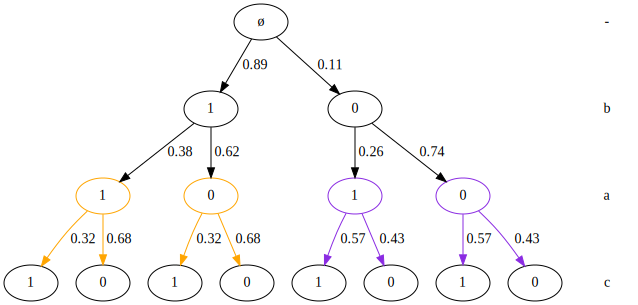

In [7]:
opttree.estimate_stage_parameters(df, alpha_tot=1.0, method="BDeu")
opttree.plot()


## Plot the minimal context DAGs

Context: None


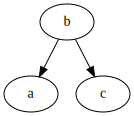

In [8]:
opt_cdags = opttree.to_minimal_context_graphs()
for key, val in opt_cdags.items():
    print("Context: {}".format(key))
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
agraph
